<a href="https://colab.research.google.com/github/nv-hiep/dust_scattering/blob/main/scat_ext_albedo_Mie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scattering and extinction efficients - Mie scattering**

# 1. Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ls

Mounted at /content/gdrive


# 2. Root directory

In [ ]:
cd '/content/gdrive/My Drive/Colab Notebooks/dust'

/content/gdrive/My Drive/Colab Notebooks/dust


# 3. Import Libraries



## 3.1 Standard libraries

In [ ]:
import os
import numpy   as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline  

## 3.2 Dust libraries

In [ ]:
import libs.constants    as c

from libs.extinction     import scatmodels

## 4. Set some parameters: dust mass column, energy range, wavelength range

In [ ]:
NH     = 1.e21                                # H column density [H cm^-2]
D2G    = 0.009                                # Dust-to-gas ratio
M_dust = NH * c.M_p * D2G                     # Dust mass column [g cm^-2]

lambda_angstrom = np.logspace(-1., 1., 100) * 1.e4    # [Angstrom]
E_keV           = c.HC_ANGS / lambda_angstrom         # keV

# 5. Scattering model

In [ ]:
# Mie scattering
scat_mod = scatmodels.Mie()

# 6. Scattering, extinction efficients and albedo

In [ ]:
def calc_(model, E, a):
	'''
	Calculate  scattering efficiency,  extinction efficiency and albedo
	model :  model
	E : Energy
	a : radius in um
	'''
	sca = model.Qsca(E, a)
	ext = model.Qext(E, a)

	return sca, ext, sca/ext

In [ ]:
sca_100A, ext_100A, albedo_100A = calc_(scat_mod, E_keV, 0.01)  # 0.01 um  =  100 Angstrom
sca_10A, ext_10A, albedo_10A    = calc_(scat_mod, E_keV, 0.001) # 0.001 um =  10 Angstrom

# 7. Plot

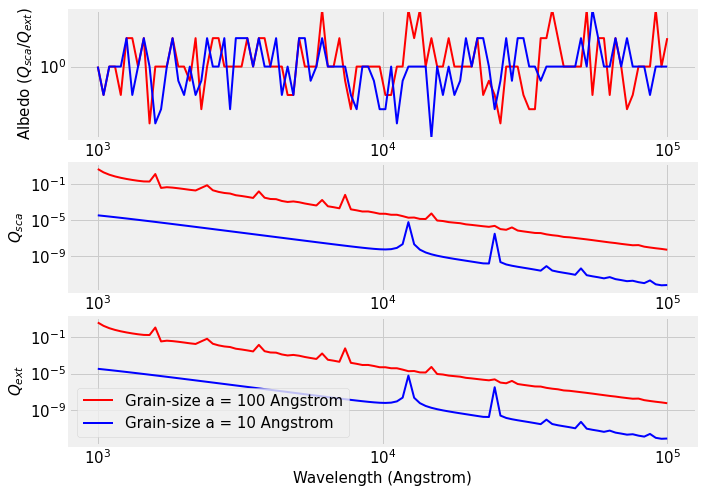

In [ ]:
plt.figure( figsize=(10, 8) )

# Axis 1
plt.subplot(311)
plt.plot(lambda_angstrom, albedo_100A, 'r-', lw=2, label='Grain-size a = 100 Angstrom')
plt.plot(lambda_angstrom, albedo_10A, 'b-', lw=2, label='Grain-size a = 10 Angstrom')

plt.ylabel(r'Albedo ($Q_{sca}/Q_{ext}$)', size=15)
plt.tick_params(labelsize=15)

plt.yscale('log')
plt.xscale('log')


# Axis 2
plt.subplot(312)
plt.plot(lambda_angstrom, sca_100A, 'r-', lw=2, label='Grain-size a = 100 Angstrom')
plt.plot(lambda_angstrom, sca_10A, 'b-', lw=2, label='Grain-size a = 10 Angstrom')

plt.ylabel(r'$Q_{sca}$', size=15)
plt.tick_params(labelsize=15)

plt.yscale('log')
plt.xscale('log')


# axis 3
plt.subplot(313)
plt.plot(lambda_angstrom, ext_100A, 'r-', lw=2, label='Grain-size a = 100 Angstrom')
plt.plot(lambda_angstrom, ext_10A, 'b-', lw=2, label='Grain-size a = 10 Angstrom')

plt.ylabel(r'$Q_{ext}$', size=15)
plt.xlabel('Wavelength (Angstrom)', size=15)
plt.tick_params(labelsize=15)

plt.yscale('log')
plt.xscale('log')

plt.legend(loc='lower left', fontsize=15)


plt.show()